# K-nearest neighbours algorithm

(K-NN) algorithm is a versatile and widely used machine learning algorithm that is primarily used for its simplicity and ease of implementation. 
- It does not require any assumptions about the underlying data distribution.
- It can also handle both numerical and categorical data, making it a flexible choice for various types of datasets in classification and regression tasks.
- It is a non-parametric method that makes predictions based on the similarity of data points in a given dataset.
- K-NN is less sensitive to outliers compared to other algorithms.

The K-NN algorithm works by finding the K nearest neighbors to a given data point based on a distance metric, such as Euclidean distance. The class or value of the data point is then determined by the majority vote or average of the K neighbors. This approach allows the algorithm to adapt to different patterns and make predictions based on the local structure of the data.

## KNN Classification

### Importing and loading data

In [1]:
# Importing libraries 
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data
data = pd.read_csv('datasets/data_cleaned.csv')

# Check the data
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


### Model building

#### Segregating variables: Independent and dependent variables

In [4]:
# Seperating independent and dependent variables
X = data.drop(['Survived'], axis=1)
y = data['Survived']

print(X.shape, y.shape)

(891, 24) (891,)


#### Scaling data

In [5]:
# Use the MinMax Scaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

print(x_scaled[:100])

[[0.27117366 0.01415106 0.         ... 0.         0.         1.        ]
 [0.4722292  0.13913574 1.         ... 1.         0.         0.        ]
 [0.32143755 0.01546857 0.         ... 0.         0.         1.        ]
 ...
 [0.28373963 0.12366717 1.         ... 1.         0.         0.        ]
 [0.42196532 0.04489301 0.         ... 0.         0.         1.        ]
 [0.42196532 0.05074862 0.         ... 0.         0.         1.        ]]


In [6]:
# Update the data
X = pd.DataFrame(x_scaled, columns = X.columns)

# Check the data
X.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Creating training and testing data

In [7]:
# Split the data 
train_x, test_x, train_y, test_y = train_test_split(X,y, random_state = 56, stratify = y)

print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(668, 24) (668,)
(223, 24) (223,)


#### Build the KNN classifier model

In [8]:
# Creating instance of KNN
clf = KNN(n_neighbors = 10)

# Fitting the model
clf.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=10)

In [9]:
# Predicting over the test Set and calculating F1
test_predict = clf.predict(test_x)

# Calculate the F1 score
f1 = f1_score(test_predict, test_y)
print('F1-Score:', f1)

F1-Score: 0.7


#### Elbow for classifier

In [11]:
def elbow_method(K):
    
    # Initiating empty list
    test_error = []
   
    # Training model for evey value of K
    for i in K:
        # Instance of KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp, test_y)
        error = 1 - tmp
        test_error.append(error)
    
    return test_error

# Defining K range
k = range(6, 20, 2)

# calling above defined function
test = elbow_method(k)

Text(0.5, 1.0, 'Elbow Curve for test')

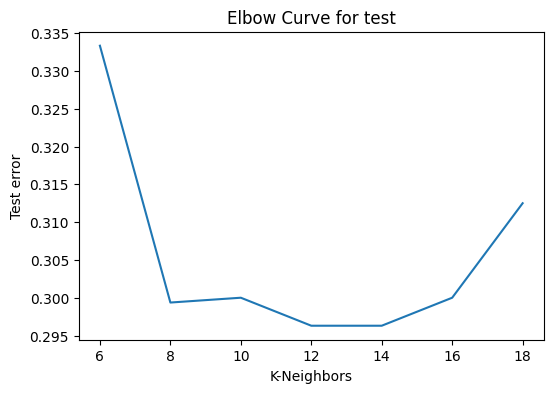

In [13]:
# Plotting the Curves
plt.figure(figsize = (6, 4))
plt.plot(k, test)
plt.xlabel('K-Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [14]:
# Creating instance of KNN
clf = KNN(n_neighbors = 12)

# Fitting the model
clf.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=12)

In [16]:
# Predicting over the test Set and calculating F1
test_predict = clf.predict(test_x)

# Calculate the F1 score
f1 = f1_score(test_predict, test_y)
print('F1-Score:', f1.round(4))

F1-Score: 0.7037


## KNN Regression

### Importing and loading data

In [17]:
# Importing KNN regressor and metric mse
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [18]:
# Load the data
data = pd.read_csv('datasets/train_cleaned.csv')

# Check the data
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


### Model building

#### Segregating variables: Independent and dependent variables

In [19]:
# Seperating independent and dependent variables
X = data.drop(['Item_Outlet_Sales'], axis = 1)
y = data['Item_Outlet_Sales']

print(X.shape, y.shape)

(8523, 45) (8523,)


#### Scaling the data 

In [20]:
# Use the MinMax Scaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

print(x_scaled[:100])

[[0.43559719 0.04886645 0.92750715 ... 1.         0.         0.        ]
 [0.27728337 0.05870508 0.0720684  ... 0.         1.         0.        ]
 [0.81967213 0.05103696 0.46828841 ... 1.         0.         0.        ]
 ...
 [0.40983607 0.22720812 0.66284661 ... 1.         0.         0.        ]
 [0.         0.08666427 0.50374196 ... 0.         0.         1.        ]
 [0.40983607 0.22725109 0.66454441 ... 1.         0.         0.        ]]


In [22]:
# Update the data
X = pd.DataFrame(x_scaled)

# Check the data
X.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.435597,0.048866,0.927507,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.277283,0.058705,0.072068,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.819672,0.051037,0.468288,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.899297,0.000000,0.640093,0.541667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.418267,0.000000,0.095805,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


#### Creating training and testing data

In [23]:
# Split the data 
train_x, test_x, train_y, test_y = train_test_split(X,y, random_state = 56)

print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(6392, 45) (6392,)
(2131, 45) (2131,)


#### Build the KNN regression model

In [24]:
# Creating instance of KNN
reg = KNN(n_neighbors = 5)

# Fitting the model
reg.fit(train_x, train_y)

KNeighborsRegressor()

In [25]:
# Predicting over the test Set and calculating MSE
test_predict = reg.predict(test_x)

MSE = mse(test_predict, test_y)
print('MSE:', MSE.round(4))

MSE: 1714854.6015


### Elbow for Classifier

In [26]:
def elbow_method(K):
    
    # Initiating empty list
    test_mse = []
  
    # Training model for evey value of K
    for i in K:
        # Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        
        # Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp, test_y)
        test_mse.append(tmp)
    
    return test_mse

# Defining K range
k = range(1,40)

# calling above defined function
test = elbow_method(k)

Text(0.5, 1.0, 'Elbow Curve for test')

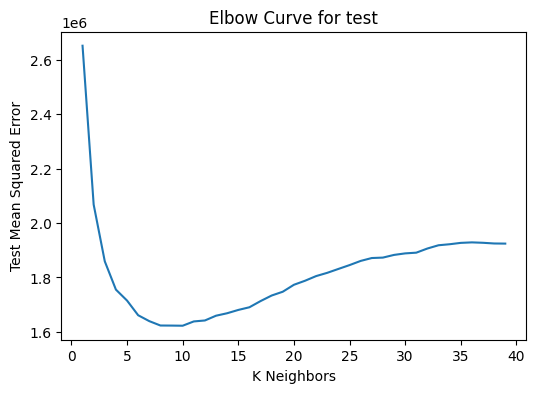

In [28]:
# Plotting the Curves
plt.figure(figsize = (6, 4))

plt.plot(k, test)

plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [31]:
# Creating instance of KNN
reg = KNN(n_neighbors = 9)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     1622957.61575
